# TP 1 - Reinforcement Learning (November 24rd)

# By Diyun Lu and Gwendal Debaussart

This assignement will be a discovery of OpenAI GYM and an implementation of Value Iteration, Policy Iteration, Q-Learning

We used the Cliff Walking Environment (also from Sutton's book).

    Adapted from Example 6.6 (page 132) from Reinforcement Learning: An Introduction
    by Sutton and Barto:
    The board is a 4x12 matrix, with (using Numpy matrix indexing):
        [3, 0] as the start at bottom-left
        [3, 11] as the goal at bottom-right
        [3, 1..10] as the cliff at bottom-center
    Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward
    and a reset to the start. An episode terminates when the agent reaches the goal.

You will be noted on the implementation of the 2 algorithms (VI, PI).
Bonus points will be given to clean, scalable code and Q-learning implementation.

You need to send this notebook in a html format and ipynb format in a compressed folder to cyriaque.rousselot(at)inria(dot)fr before December, 1st.

Good luck !


## A gentle start with OpenAI Gym

### Looking to the environment

Have a look at the documentation of gym https://gym.openai.com/docs/#environments  and of the Cliff Walking Environement https://www.gymlibrary.dev/environments/toy_text/cliff_walking/to fill the lines 


Q1. Display the Action Space / State space of the CliffWalking environment

In [1]:
import gym
import numpy as np
from matplotlib import pyplot as plt
import time 


print("="*10 + "Load the environement"+"="*10)
env = gym.make('CliffWalking-v0') # TO IMPLEMENT
env.reset()
print("="*10 + "Visualize the environement"+"="*10)
env.render()
print(env.render())
## Action Space

nb_actions = 4
print("="*10 + "Action Space"+"="*10)
action = ["up", "right", "down", "left"]
print(action) # TO IMPLEMENT 

## State space
nb_states = 48
print("="*10 + "State Space"+"="*10)
print(env.nS) # TO IMPLEMENT 



==========Load the environement==========
==========Visualize the environement==========
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

None
==========Action Space==========
['up', 'right', 'down', 'left']
==========State Space==========
48


### Use of a random policy

Q2. Implement a policy that chose an action randomly

Q3. Implement a policy that chose always the action "go right"

In [2]:
import random

def RandomPolicy(state):
    return env.action_space.sample()


def GoRightPolicy(state):
    return env.step(3)


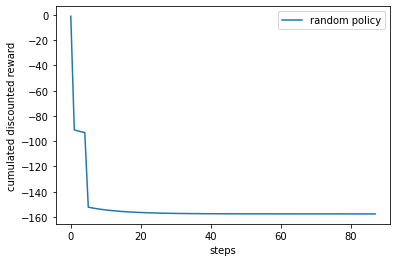

In [3]:
# Verify your policies with this cell
def SimulateTrajectory(T,Pi,s0):
    """return a vector of T successive states and a vector of T successive rewards"""
    Rewards = np.zeros(T+1)
    States = np.zeros(T+1)
    env= gym.make('CliffWalking-v0')
    state = env.reset()
    for t in range(T):
        States[t]=state
        action=Pi(state)
        state,rew,x,y=env.step(action)
        Rewards[t]=rew
    return States,Rewards

gamma = 0.9 # discount factor 
s1 = 36 # initial state
T = int(np.log(1/(0.001*(1-gamma)))/np.log(1/gamma)) # truncation of the infinite sum
States1,Rewards1 = SimulateTrajectory(T, RandomPolicy,s1)

# plot cumulative discounted reward (on a single run):
plt.figure()
plt.plot(np.cumsum(Rewards1*np.array([gamma**t for t in range(T+1)])),label="random policy")

plt.xlabel('steps')
plt.ylabel('cumulated discounted reward')
plt.legend()
plt.show()


Q4. Implement the optimum policy and display the trajectory from the initial state.

## Dynamic Programming

In order to use our dynamic programming algorithms, we need to know the parameters of the MDP. 
Here we know the reward and transition model. 

Q5. Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward.
Implement  the reward r(s,a)

Q6. Implement the Transition model p(s' | s,a) 

In [4]:
# Can be useful 
def number_to_grid(x):
    return(x//12,x%12)

def grid_to_number(x):
    return(x[0]*12+x[1])

# MDP parameters
nb_states =48
nb_actions = 4
P = np.zeros((nb_states,nb_actions,nb_states)) # P[s,a,s'] = p(s' | s,a) 
r = np.zeros((nb_states,nb_actions)) # r[s,a] = average reward received in state s when playing action a

for state in range(nb_states):
    for action in range(nb_actions):
        r[state][action] = env.env.P[state][action][0][2]
        
        new_state = env.env.P[state][action][0][1]
        P[state][action][new_state] = env.env.P[state][action][0][0]


In [5]:
#TO IMPLEMENT
action = ["up", "right", "down", "left"]
random_action = random.randint(0, 3)
env.reset()
print ("Action taken:", action[random_action])
next_state, reward, is_terminal, transition_prob = env.step(random_action)
env.reset()
print ("Transition model:", transition_prob)
print ("Next state:", next_state)
print ("Reward recieved:", reward)
print ("Terminal state:", is_terminal)

Action taken: right
Transition model: {'prob': 1.0}
Next state: 36
Reward recieved: -100
Terminal state: False


### Policy Iteration

In this section, we will consider policies as a vector. A policy  is represented as a vector pi[s] with s a state. 

In [6]:
example_pi =  np.random.choice([0,1,2,3], nb_states)  # An example of random  policy

In [7]:
state = 13
example_pi[state]# Gives you the action from state 13

0

Q.7 Using the Bellman equations, build the evaluation of a policy. We consider convergence with $\epsilon = 0.01$ or if we performed a maximum of 10000 iterations.

In [8]:
def policy_evaluation(policy):
    V = np.zeros(nb_states) # intialize V to 0's
    epsilon =0.1
    max_iter = 10000
    
    # TO COMPLETE
    for _ in range(max_iter):
        prev_V = np.copy(V)
        for s in range(env.env.nS):  
            policy_a = policy[s]
            for p, s_, r, _ in env.env.P[s][policy_a]:
                V[s] = sum([p * (r + gamma * prev_V[s_])])
  
        """When the sum of the difference between the v value of each state calculated this time and the previous calculation is less than a number, 
        we consider that the behavior of estimating the v value under the policy policy has been completed"""
        if np.sum(np.abs(prev_V - V)) < epsilon: 
            break
    return V



Q.8 Build a policy improvement function for both Value and Policy evaluation

In [9]:
def policy_improve(V, policy):
    
    for s in range(env.env.nS):
        """Calculate all q_sa, and then for each state S, 
        choose the a that maximizes the value of q_sa"""
        q_sa = np.zeros(env.env.nA)
        for a in range(env.env.nA):
            q_sa[a] = sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.env.P[s][a]])

        policy[s] = np.argmax(q_sa)
        
    return policy
    # TO IMPLEMENT

Q.9 Using the two preceding functions, build the Policy Iteration algorithm

In [10]:
def policy_iteration(state):
    policy = np.random.choice(env.env.nA, size=(env.env.nS))
    max_iteration = 10000
    for i in range(max_iteration):
        V = policy_evaluation(policy)
        new_policy = policy_improve(V, policy)
        if np.all(policy == new_policy):
            print("Policy Iteration converged at step %i" % (i + 1))
            break
        policy = new_policy

    return policy


Q.10 Test your policy using the SimulateTrajectory() function

Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
Policy Iteration converged at step 1
P

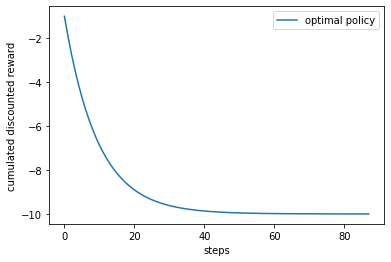

In [11]:
# Verify your policies with this cell
def SimulateTrajectory(T,Pi,s0):
    """return a vector of T successive states and a vector of T successive rewards"""
    Rewards = np.zeros(T+1)
    States = np.zeros(T+1)
    env= gym.make('CliffWalking-v0')
    state = env.reset()
    for t in range(T):
        States[t]=state
        action=Pi(state)[s0]
        state,rew,x,y=env.step(action)
        Rewards[t]=rew
    return States,Rewards

gamma = 0.9 # discount factor 
s1 = 36 # initial state
T = int(np.log(1/(0.001*(1-gamma)))/np.log(1/gamma)) # truncation of the infinite sum
States1,Rewards1 = SimulateTrajectory(T, policy_iteration, s1)

# plot cumulative discounted reward (on a single run):
plt.figure()
plt.plot(np.cumsum(Rewards1*np.array([gamma**t for t in range(T+1)])),label="optimal policy")

plt.xlabel('steps')
plt.ylabel('cumulated discounted reward')
plt.legend()
plt.show()


(BONUS QUESTION) 
Try to build a similar Policy Evaluation algorithm with stochastic policies . Can it be useful ? Argument

A stochastic policy  is represented as a vector pi[a,s] with s a state and a an action

In [12]:
example_pi_stochastic = np.random.rand( nb_states, nb_actions)  # An example of random stochastic policy
example_pi_stochastic = example_pi_stochastic/example_pi_stochastic.sum(axis=1)[:,None] # Normalized to get pbty
print(example_pi_stochastic[36])  # Here are the probability of chosing the indexed actions


[0.44400871 0.02353395 0.47747828 0.05497907]


In [13]:
########First we will adapt the value evaluation to the stochastic policies
def policy_evaluation_stochastic(policy, epsilon = 0.01, max_iter = 10000):
    V = np.zeros(nb_states) # intialize V to 0's
    
    # TO COMPLETE : we're using the algorithm shown in the PDF files.
    for _ in range(max_iter):
        V = np.zeros(env.env.nS)
        delta = 0 
       
        for state in range(env.env.nS):  
            val = 0 
            for action,act_prob in enumerate(policy[state]): 
                for prob,next_state,reward,____ in env.env.P[state][action]:  
                    val += act_prob * prob * (reward + gamma * V[next_state])  
            delta = max(delta, np.abs(val-V[state]))
            V[state] = val
        if delta < epsilon:  
            break
    return np.array(V)

In [14]:
#####The equivalent of the improve version we had above, here we are doing the for all state par outside the loop
def policy_improve_sto(state, V):
    q_sa = np.zeros(env.env.nA)
    for a in range(env.env.nA):
        q_sa[a] = sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.env.P[s][a]])
        
    return q_sa

In [15]:
def policy_iteration_sto(max_iteration = 10000):
    policy = np.ones([env.env.nS, env.env.nA]) / env.env.nA
    
    for i in range(max_iteration):

        V = policy_evaluation_stochastic(policy)
        for s in range(env.env.nS):
            chosen_action = np.argmax(policy[s])
            q_sa = policy_improve_sto(state, V)
            best_action = np.argmax(q_sa)
            
            if chosen_action != best_action :
                policy[state] = np.eye(env.env.nA)[best_act]
            else:
                return policy, V

    return policy, np.zeros(env.env.nS)

### Value Iteration

Q.11 Similarly to the Policy Iteration algorithm, build the Value Iteration Algorithm and test it.

In [16]:
def value_iteration(state):
    """
    :param env:
    :param gamma:
    :return:
    """
    V = np.zeros(env.env.nS)
    max_iterations = 10000
    epsilon =0.1
    for i in range(max_iterations):
        prev_V = np.copy(V)
        for s in range(env.env.nS):
            q_sa = [sum([p * (r + gamma * prev_V[s_]) for p, s_, r, _ in env.env.P[s][a]]) for a in range(env.env.nA)]
            V[s] = max(q_sa)
        if np.sum(np.fabs(prev_V - V)) < epsilon:
            print("Value function converged at iteration %d" % (i + 1))
            break
    init_policy = np.zeros(env.env.nS)
    policy = policy_improve(V, init_policy)
    return policy


Value function converged at iteration 60


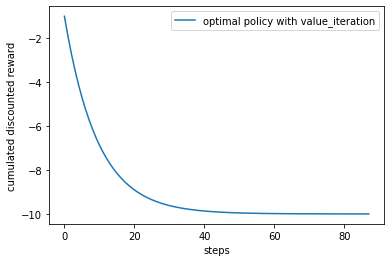

In [17]:
# Verify your policies with this cell
def SimulateTrajectory(T,Pi,s0):
    """return a vector of T successive states and a vector of T successive rewards"""
    Rewards = np.zeros(T+1)
    States = np.zeros(T+1)
    env= gym.make('CliffWalking-v0')
    state = env.reset()
    for t in range(T):
        States[t]=state
        action=Pi(state)
        state,rew,x,y=env.step(action)
        Rewards[t]=rew
    return States,Rewards

gamma = 0.9 # discount factor 
s1 = 36 # initial state
policy_value_iteration = value_iteration(state)
polic_v_i_f = lambda x : policy_value_iteration[x]

T = int(np.log(1/(0.001*(1-gamma)))/np.log(1/gamma)) # truncation of the infinite sum
States1,Rewards1 = SimulateTrajectory(T, polic_v_i_f, s1)

# plot cumulative discounted reward (on a single run):
plt.figure()
plt.plot(np.cumsum(Rewards1*np.array([gamma**t for t in range(T+1)])),label="optimal policy with value_iteration")

plt.xlabel('steps')
plt.ylabel('cumulated discounted reward')
plt.legend()
plt.show()

### Q-Learning

Now we don't have access to the Reward and Transitions table anymore ! We will have to explore to build our knowledge of the action-value Q(s,a) along the way.

Q.12 Give the Bellman Equation for Q.

$Q(s_t,a_t)$ $\leftarrow$ $Q(s_t,a_t)$+ $\alpha$ [$\gamma$ $(S_{t+1})$+$\gamma$ $maxQ(s_{t+1},a_{t+1})$]

Q.13  Implement the Q-Learning algorithm. We will store action-value information in a table q[s,a]. 

You will need :
- a function act() to act in the environement 
- a function update() to learn the optimal actions and improve your knowledge of q.
- a function train() that use both precedent functions.


In [69]:
q = np.zeros([nb_states, nb_actions])
alpha = 0.1
gamma = 0.6
epsilon = 0.1

def act(state): # TO COMPLETE
    action = 0
    if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample() # Explore action space
    else:
        action = np.argmax(q[state]) # Exploit learned values
    return action

def update(state,action,reward,state1,is_done):
    if not is_done:
        old_value = q[state, action]
        next_max = np.max(q[state1])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q[state, action] = new_value
    else:
        return
    

def train(env,n_iter):
    state = 36
    for _ in range(n_iter):
        action = act(state)
        state1, reward, is_done, _ = env.step(action)
        update(state,action,reward,state1,is_done)
        state = state1

train(env, 100000)

Q.14 Visualize the obtained policy after training . Is it optimal ? 

Text(0, 0.5, 'max q_value for each state')

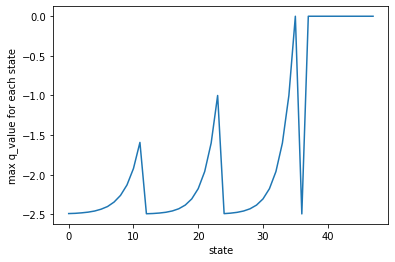

In [70]:
q_max_list = []
policy_q = []
state_q = []
for i, val in enumerate(q):
    q_max_list.append(np.max(val))
    policy_q.append(np.argmax(val))
    state_q.append(i)

plt.plot(q_max_list)
plt.xlabel("state")
plt.ylabel("max q_value for each state")

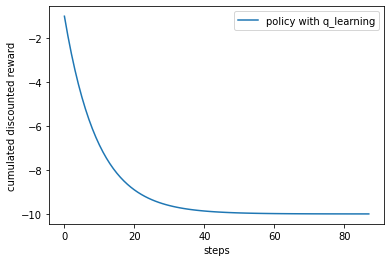

In [71]:
def obtained_policy(state):
    return policy_q[state]

# Verify your policies with this cell
def SimulateTrajectory(T,Pi,s0):
    """return a vector of T successive states and a vector of T successive rewards"""
    Rewards = np.zeros(T+1)
    States = np.zeros(T+1)
    env= gym.make('CliffWalking-v0')
    state = env.reset()
    for t in range(T):
        States[t]=state
        action=Pi(state)
        state,rew,x,y=env.step(action)
        Rewards[t]=rew
    return States,Rewards

gamma = 0.9 # discount factor 
s1 = 36 # initial state

T = int(np.log(1/(0.001*(1-gamma)))/np.log(1/gamma)) # truncation of the infinite sum
States1,Rewards1 = SimulateTrajectory(T, obtained_policy, s1)

# plot cumulative discounted reward (on a single run):
plt.figure()
plt.plot(np.cumsum(Rewards1*np.array([gamma**t for t in range(T+1)])),label="policy with q_learning")

plt.xlabel('steps')
plt.ylabel('cumulated discounted reward')
plt.legend()
plt.show()

In [72]:
state_list = []
frames = []
for i, action in enumerate(policy_q):
    next_state, reward, is_done, _ = env.step(action)
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': next_state,
        'action': action,
        'q_value': q_max_list[i]
        }
    )

In [73]:
from IPython.display import clear_output
from time import sleep
    

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"q_value: {frame['q_value']}")
        sleep(.4)

print_frames(frames)

o  o  o  o  o  o  o  o  o  o  o  x
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


Timestep: 48
State: 11
Action: 1
q_value: 0.0
